In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from scipy.stats import norm
Z = norm(0, 1).pdf

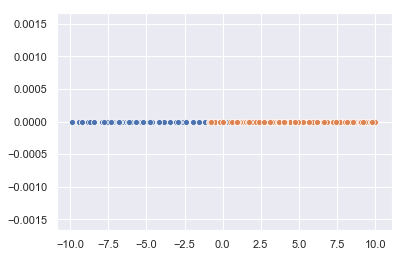

In [13]:
# Creating Dummy Data
x1 = np.random.randint(-10, 1, size=(101)) + np.random.rand(101)
x2 = np.random.randint(-1, 10, size=(101)) + np.random.rand(101)
X = np.hstack((x1, x2))
sns.scatterplot(x1, [0]*len(x1))
sns.scatterplot(x2, [0]*len(x2))

In [16]:
# Need to fit two gaussians
cluster_probab_A = np.zeros_like(X)
cluster_probab_B = np.zeros_like(X)
# Lets fit two clusters
theta_A = {'mean':-0.9, 'var':1, 'prior':0.4}
theta_B = {'mean':0.9, 'var':2, 'prior':0.6}

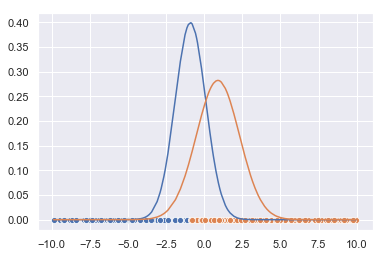

In [17]:
sns.scatterplot(x1, [0]*len(x1))
sns.scatterplot(x2, [0]*len(x2))
indices = np.argsort(X)
plt.plot(X[indices], norm(theta_A['mean'], np.sqrt(theta_A['var'])).pdf(X)[indices])
plt.plot(X[indices], norm(theta_B['mean'], np.sqrt(theta_B['var'])).pdf(X)[indices])

In [18]:
def probab(X, prob_dict):
    return (norm(prob_dict['mean'], np.sqrt(prob_dict['var'])).pdf(X)) * prob_dict['prior']

# Finding the first clusters probability based on the simple probability distribution
cluster_probab_A = probab(X, theta_A)/(probab(X, theta_A) + probab(X, theta_B))
# Finding the second clusters probability based on the simple probability distribution
cluster_probab_B = probab(X, theta_B)/(probab(X, theta_A) + probab(X, theta_B))

In [21]:
# Now changing the values of the means and variance based on the update rule
theta_A['mean'] = np.sum(cluster_probab_A * X)/np.sum(cluster_probab_A)
theta_B['mean'] = np.sum(cluster_probab_B * X)/np.sum(cluster_probab_B)
theta_A['var'] = np.sum(cluster_probab_A * ((X - theta_A['mean'])**2))/np.sum(cluster_probab_A)
theta_B['var'] = np.sum(cluster_probab_B * ((X - theta_B['mean'])**2))/np.sum(cluster_probab_B)
theta_A['prior'] = np.sum(cluster_probab_A)/len(cluster_probab_A)
theta_B['prior'] = np.sum(cluster_probab_B)/len(cluster_probab_B)

In [ ]:
theta_A

In [ ]:
theta_B

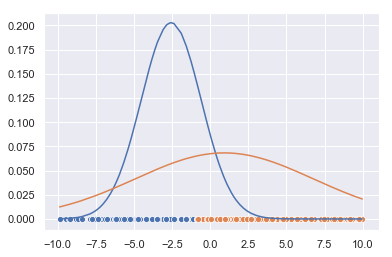

In [20]:
sns.scatterplot(x1, [0]*len(x1))
sns.scatterplot(x2, [0]*len(x2))
indices = np.argsort(X)
plt.plot(X[indices], norm(theta_A['mean'], np.sqrt(theta_A['var'])).pdf(X)[indices])
plt.plot(X[indices], norm(theta_B['mean'], np.sqrt(theta_B['var'])).pdf(X)[indices])

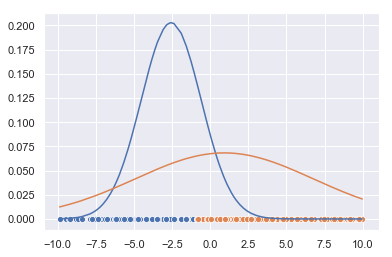

In [22]:
sns.scatterplot(x1, [0]*len(x1))
sns.scatterplot(x2, [0]*len(x2))
indices = np.argsort(X)
plt.plot(X[indices], norm(theta_A['mean'], np.sqrt(theta_A['var'])).pdf(X)[indices])
plt.plot(X[indices], norm(theta_B['mean'], np.sqrt(theta_B['var'])).pdf(X)[indices])